<a href="https://colab.research.google.com/github/ksh168/Deep-Learning-Projects/blob/master/Digits%20MNIST(simple%20neural%20network)/handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train.shape

(60000, 28, 28)

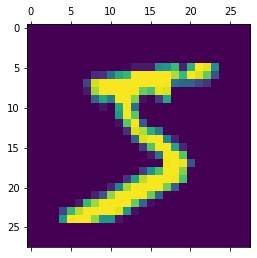

In [5]:
plt.matshow(X_train[0])

In [6]:
#scaling
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)

In [8]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)

### First let's make a model with 2 layers: input and output

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784, ), activation = 'sigmoid')
])

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4875 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3062 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2855 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2751 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2677 - accuracy: 0.9258


In [12]:
#test the model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 844us/step - loss: 0.2663 - accuracy: 0.9260


[0.26630541682243347, 0.9259999990463257]

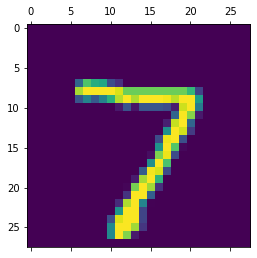

In [13]:
plt.matshow(X_test[0])

In [14]:
y_predicted = model.predict(X_test_flattened)

In [15]:
#let's see what model predicted
np.argmax(y_predicted[0])

7

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
# confusion matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    1,    0,    5,   10,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   5,    8,  926,   18,    6,    5,   13,   11,   36,    4],
       [   3,    0,   17,  920,    0,   29,    2,   11,   21,    7],
       [   1,    1,    4,    2,  891,    0,   13,    4,    8,   58],
       [   9,    2,    2,   29,    6,  789,   18,    6,   24,    7],
       [   8,    3,    7,    1,    7,   11,  917,    2,    2,    0],
       [   1,    6,   24,    2,    4,    1,    0,  952,    1,   37],
       [   7,    9,    7,   20,    8,   30,   11,   13,  858,   11],
       [  11,    7,    1,   10,   13,    6,    0,   23,    5,  933]],
      dtype=int32)>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(69.0, 0.5, 'Truth')

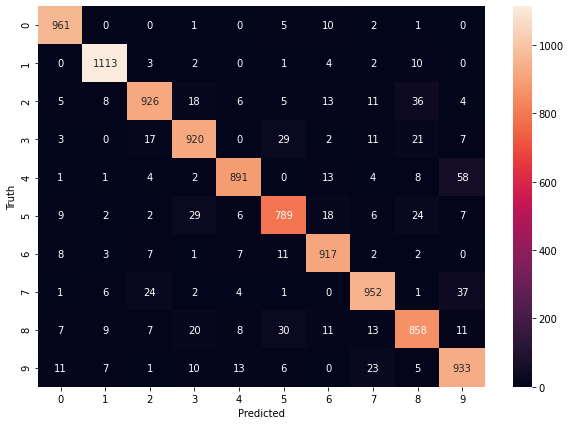

In [19]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now let's make a model with 3 layers: input, hidden and output

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784, ), activation = 'sigmoid'),     #hidden layer, the 100 is arbitary
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [21]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [22]:
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4303 - accuracy: 0.8961
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1994 - accuracy: 0.9426
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1511 - accuracy: 0.9571
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1210 - accuracy: 0.9658
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0995 - accuracy: 0.9719


In [23]:
#test the model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 964us/step - loss: 0.1109 - accuracy: 0.9671


[0.11085900664329529, 0.9671000242233276]

In [24]:
y_predicted = model.predict(X_test_flattened)

In [25]:
#let's see what model predicted
np.argmax(y_predicted[0])

7

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [28]:
# confusion matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    2,    1,    0,    3,    2,    1,    1,    0],
       [   0, 1124,    3,    0,    0,    1,    4,    1,    2,    0],
       [   8,    2,  992,    6,    5,    0,    3,    6,   10,    0],
       [   0,    0,    5,  986,    0,    2,    1,    9,    5,    2],
       [   1,    0,    4,    0,  957,    0,    7,    2,    2,    9],
       [   4,    1,    0,   18,    3,  850,    8,    0,    5,    3],
       [   8,    3,    0,    1,    5,    6,  933,    0,    2,    0],
       [   2,    7,   12,    7,    2,    0,    0,  988,    1,    9],
       [   5,    3,    5,   10,    8,    5,    5,    6,  925,    2],
       [   9,    4,    0,   10,   26,    4,    0,   10,    0,  946]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

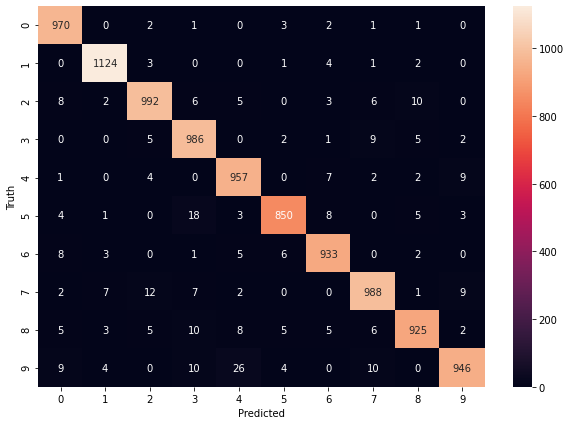

In [29]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
# now there's inbuilt way so that we don't have to flatten the data
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, activation = 'relu'),     #hidden layer, the 100 is arbitary
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#so no need to use X_train_flattened here
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.9188
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1365 - accuracy: 0.9599
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0978 - accuracy: 0.9709
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0760 - accuracy: 0.9775
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0606 - accuracy: 0.9815
